In [2]:
import numpy as np
import pandas as pd
import astropy
from astropy import table
from astropy.io import fits
%matplotlib inline
import matplotlib.pyplot as plt
from glob import glob
#from numpy.lib import recfunctions as rfn # to convert record array to regular array

### Christina/Jonah Data

In [8]:
tbl = astropy.table.Table.read('Christina_Jonah_data/darks_with_resist/1s_darks/psd_201111_152123_tint1s_sdr0_fsw50Ohm_calibration_wLNA.fits')
print(tbl)
print(tbl.columns)

    freq1          freq2      ...      fsw_rvel2              fsw_pow        
-------------- -------------- ... ------------------- -----------------------
  1419443000.0   1418969000.0 ...  303.24247062455555   0.0009688829733394159
1419444171.875 1418970171.875 ...  302.99513335044804  0.00030748001025515063
 1419445343.75  1418971343.75 ...   302.7477960763886   7.056302848247164e-05
1419446515.625 1418972515.625 ...  302.50045880232915   0.0004849850576371037
  1419447687.5   1418973687.5 ...  302.25312152826973 -0.00020804570107848478
1419448859.375 1418974859.375 ...  302.00578425421025   9.300033288920859e-05
 1419450031.25  1418976031.25 ...   301.7584469801028  0.00027375115923717296
1419451203.125 1418977203.125 ...   301.5111097060433 -0.00013798471201678826
  1419452375.0   1418978375.0 ...   301.2637724319839   9.076712934689545e-05
1419453546.875 1418979546.875 ...   301.0164351579245 -0.00034208554244172153
           ...            ... ...                 ...           

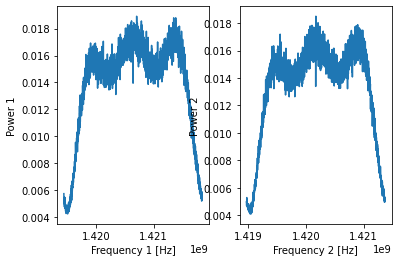

In [9]:
plt.subplot(121)
plt.plot(tbl['freq1'], tbl['power1'])
plt.ylabel('Power 1')
plt.xlabel('Frequency 1 [Hz]')

plt.subplot(122)
plt.plot(tbl['freq2'], tbl['power2'])
plt.ylabel('Power 2')
plt.xlabel('Frequency 2 [Hz]')
plt.show()

### Francisco data

In [10]:
path = 'Francisco_data/'
tbl1 = astropy.table.Table.read(path+'psd_201113_020041_tint1s_sdr0_fswbasic_calibration_resistor_on_1s_1.fits')
# hmm let's see if I can do this more elegantly, even with record arrays
# it appears so: https://stackoverflow.com/questions/5957380/convert-structured-array-to-regular-numpy-array

In [11]:
file_names1 = glob(path+'*calibration_resistor_on_1s_*')
file_names2 = glob(path+'*calibration_resistor_off_1s_*')
file_names3 = glob(path+'*calibration_lan_resistor_on_1s_*')
file_names4 = glob(path+'*calibration_lan_resistor_off_1s_*')

def median_combine(file_names, col_names):
    images = []
    for i in range(len(file_names)):
        image = fits.getdata(np.sort(file_names)[i])
        #image = image.view((float, len(image.dtype.names))) # convert record array to regular nd numpy array
        #image = rfn.unstructured_to_structured(image)
        image = np.array(image.tolist())
        images.append(image)
    im_array = np.array(images)
    combine = np.median(1.0*im_array, axis=0)
    return pd.DataFrame(combine, columns=col_names)


In [ ]:
"""
# original test: median-combine 1s resister on/no LNA dark frames
dark1_res = np.median(1.0*im_array, axis=0)
print(dark1_res.shape)
dark1_res = pd.DataFrame(dark1_res, columns=tbl.columns)
print(dark1_res)
"""

In [69]:
dark_res = median_combine(file_names1, tbl.columns)
dark = median_combine(file_names2, tbl.columns)
dark_lan_res = median_combine(file_names3, tbl.columns)
dark_lan = median_combine(file_names4, tbl.columns)
darks = [dark_res, dark, dark_lan_res, dark_lan]
titles = ['Dark 1s Resistor On LNA Off', 'Dark 1s Resistor Off LNA Off', 
          'Dark 1s Resistor On LNA On', 'Dark 1s Resistor Off LNA On']

### 1.5.2 Plot calibration data

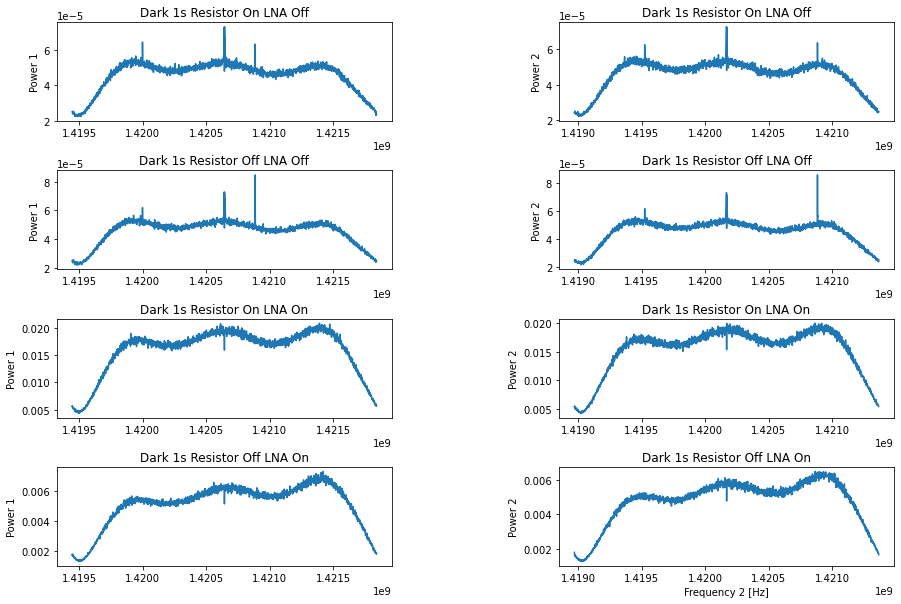

In [70]:
fig, axes = plt.subplots(ncols=2, nrows=4, figsize=(15,10))
fig.set_size_inches(15, 10)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
axes = axes.flatten()
for i in range(len(darks)):
    #ax = axes[i]
    #fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(10,3))
    plt.subplot(421+2*i)
    plt.ylabel('Power 1')
    plt.title(titles[i])
    plt.plot(darks[i]['freq1'], darks[i]['power1']) # cycle back once
    
    plt.subplot(422+2*i)
    plt.ylabel('Power 2')
    plt.title(titles[i])
    plt.plot(darks[i]['freq2'], darks[i]['power2']) # cycle back once

plt.xlabel('Frequency 1 [Hz]')
plt.xlabel('Frequency 2 [Hz]')
plt.savefig('freq_v_power.png', bbox_inches='tight', dpi=100)
plt.show()

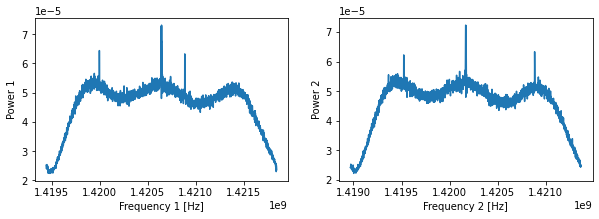

In [113]:
"""f = plt.figure(figsize=(10,3))
#plt.subplots_adjust(wspace=0.5)

plt.subplot(421)
plt.plot(dark1_res['freq1'], dark1_res['power1'])
plt.ylabel('Power 1')
plt.xlabel('Frequency 1 [Hz]')
plt.title('Dark 1s Resister On LNA Off')

plt.subplot(422)
plt.plot(dark1_res['freq2'], dark1_res['power2'])
plt.ylabel('Power 2')
plt.xlabel('Frequency 2 [Hz]')
plt.title('Dark 1s Resister On LNA Off')

plt.subplot(423)
plt.plot(dark1_res['freq1'], dark1_res['power1'])
plt.ylabel('Power 1')
plt.xlabel('Frequency 1 [Hz]')
plt.title('Dark 1s Resister On LNA Off')

plt.subplot(424)
plt.plot(dark1_res['freq2'], dark1_res['power2'])
plt.ylabel('Power 2')
plt.xlabel('Frequency 2 [Hz]')
plt.title('Dark 1s Resister Off LNA Off')

plt.subplot(425)
plt.plot(dark1_res['freq1'], dark1_res['power1'])
plt.ylabel('Power 1')
plt.xlabel('Frequency 1 [Hz]')
plt.title('Dark 1s Resister On LNA Off')

plt.subplot(426)
plt.plot(dark1_res['freq2'], dark1_res['power2'])
plt.ylabel('Power 2')
plt.xlabel('Frequency 2 [Hz]')
plt.title('Dark 1s Resister Off LNA Off')

plt.subplot(427)
plt.plot(dark1_res['freq1'], dark1_res['power1'])
plt.ylabel('Power 1')
plt.xlabel('Frequency 1 [Hz]')
plt.title('Dark 1s Resister On LNA Off')

plt.subplot(428)
plt.plot(dark1_res['freq2'], dark1_res['power2'])
plt.ylabel('Power 2')
plt.xlabel('Frequency 2 [Hz]')
plt.title('Dark 1s Resister Off LNA Off')


plt.show()"""

### Frequency switching (1.5.3)

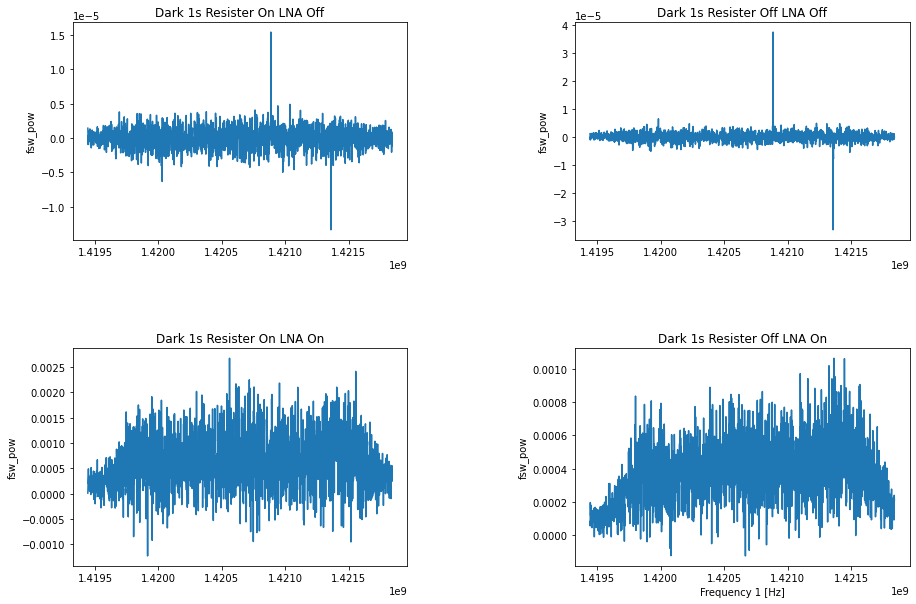

In [14]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(15,10))
fig.set_size_inches(15, 10)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
axes = axes.flatten()
for i in range(len(darks)):
    #ax = axes[i]
    #fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(10,3))
    plt.subplot(221+i)
    plt.ylabel('fsw_pow') # frequency switched wavelength(?) power
    plt.title(titles[i])
    plt.plot(darks[i]['freq1'], darks[i]['fsw_pow']) # cycle back once

plt.xlabel('Frequency 1 [Hz]')
plt.savefig('freq_v_fswpow.png', bbox_inches='tight', dpi=100)
plt.show()

### Observations

In [15]:
obs1 = astropy.table.Table.read(path+'psd_201113_133903_tint60s_sdr0_fswscience_loc1_60s.fits')
obs2 = astropy.table.Table.read(path+'psd_201113_134953_tint60s_sdr0_fswscience_loc2_60s.fits')
obs3 = astropy.table.Table.read(path+'psd_201113_135520_tint60s_sdr0_fswscience_loc3_60s.fits')

#### Obs 1

In [16]:
print(obs1)
print(obs1.columns)

    freq1          freq2      ...      fsw_rvel2             fsw_pow        
-------------- -------------- ... ------------------- ----------------------
  1419443000.0   1418969000.0 ...  303.24247062455555 0.00011705493636777293
1419444171.875 1418970171.875 ...  302.99513335044804 0.00011942696305302682
 1419445343.75  1418971343.75 ...   302.7477960763886 0.00011796418169396708
1419446515.625 1418972515.625 ...  302.50045880232915 0.00012765218679265276
  1419447687.5   1418973687.5 ...  302.25312152826973 0.00014658282242724537
1419448859.375 1418974859.375 ...  302.00578425421025 0.00014461662807294974
 1419450031.25  1418976031.25 ...   301.7584469801028 0.00010520958436577603
1419451203.125 1418977203.125 ...   301.5111097060433 0.00013878538675781045
  1419452375.0   1418978375.0 ...   301.2637724319839  7.103718203667602e-05
1419453546.875 1418979546.875 ...   301.0164351579245  0.0001139491508385963
           ...            ... ...                 ...                    ...

In [17]:
dark_lnaon_resistoroff = astropy.table.Table.read(path+'psd_201113_025357_tint60s_sdr0_fswbasic_calibration_lan_resistor_off_60s.fits')
print(dark_lnaon_resistoroff)
print(dark_lnaon_resistoroff.columns)

    freq1          freq2      ...      fsw_rvel2             fsw_pow        
-------------- -------------- ... ------------------- ----------------------
  1419443000.0   1418969000.0 ...  303.24247062455555 0.00017589968990413185
1419444171.875 1418970171.875 ...  302.99513335044804 0.00018346343969543786
 1419445343.75  1418971343.75 ...   302.7477960763886 0.00017662129284548643
1419446515.625 1418972515.625 ...  302.50045880232915 0.00016964389315354237
  1419447687.5   1418973687.5 ...  302.25312152826973 0.00018105850403195138
1419448859.375 1418974859.375 ...  302.00578425421025 0.00017498344437362175
 1419450031.25  1418976031.25 ...   301.7584469801028  0.0001622242593305684
1419451203.125 1418977203.125 ...   301.5111097060433 0.00016901548399573412
  1419452375.0   1418978375.0 ...   301.2637724319839  0.0001720590866620881
1419453546.875 1418979546.875 ...   301.0164351579245 0.00014556722758658075
           ...            ... ...                 ...                    ...

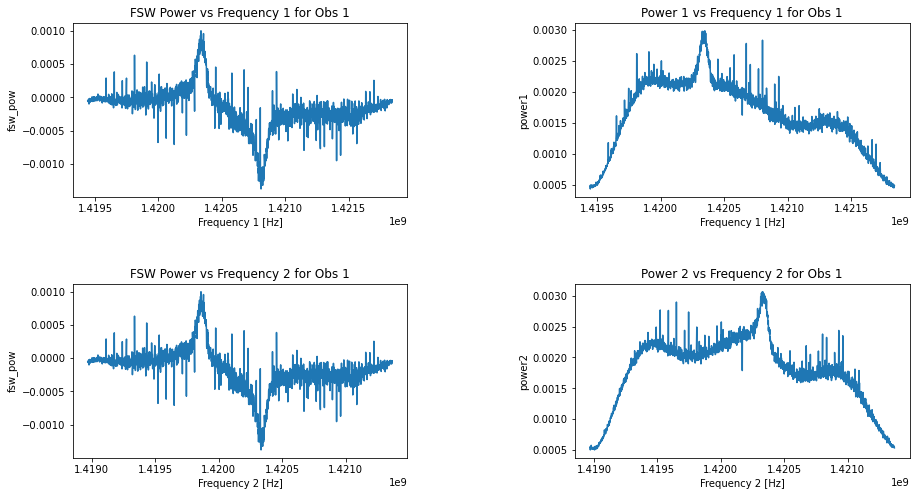

In [54]:
# dark subtracted obs 1
f = plt.figure(figsize=(15,8))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.subplot(221)
plt.plot(obs1['freq1'], obs1['fsw_pow']-dark_lnaon_resistoroff['fsw_pow'])
plt.ylabel('fsw_pow')
plt.xlabel('Frequency 1 [Hz]')
plt.title('FSW Power vs Frequency 1 for Obs 1')

plt.subplot(222)
plt.plot(obs1['freq1'], obs1['power1']-dark_lnaon_resistoroff['power1'])
plt.ylabel('power1')
plt.xlabel('Frequency 1 [Hz]')
plt.title('Power 1 vs Frequency 1 for Obs 1')

plt.subplot(223)
plt.plot(obs1['freq2'], obs1['fsw_pow']-dark_lnaon_resistoroff['fsw_pow'])
plt.ylabel('fsw_pow')
plt.xlabel('Frequency 2 [Hz]')
plt.title('FSW Power vs Frequency 2 for Obs 1')

plt.subplot(224)
plt.plot(obs1['freq2'], obs1['power2']-dark_lnaon_resistoroff['power2'])
plt.ylabel('power2')
plt.xlabel('Frequency 2 [Hz]')
plt.title('Power 2 vs Frequency 2 for Obs 1')

plt.show()

HI emission, check.

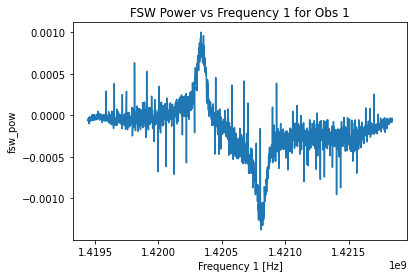

In [19]:
# dynamic zooming
#%matplotlib notebook
%matplotlib inline
#plt.figure()
#f = plt.figure(figsize=(15,8))
#plt.subplots_adjust(wspace=0.5, hspace=0.5)
#plt.subplot(221)
plt.plot(obs1['freq1'], obs1['fsw_pow']-dark_lnaon_resistoroff['fsw_pow'])
plt.ylabel('fsw_pow')
plt.xlabel('Frequency 1 [Hz]')
plt.title('FSW Power vs Frequency 1 for Obs 1')

plt.show()

In [55]:
# mask for Gaussian fitting over the emission line
mask = obs1[(obs1['freq1'] < 1.42045e9) & (obs1['freq1'] > 1.420225e9)]
mask_freq, mask_pow = mask['freq1'], mask['fsw_pow']
print(max(mask_freq)-min(mask_freq))

223828.125


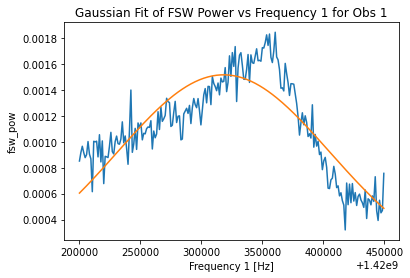

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
         amplitude             mean              stddev     
    ------------------- ------------------ -----------------
    0.00151543273911005 1420318258.3908145 87187.30082260002
estimated amplitude of emission line:  Parameter('amplitude', value=0.00151543273911005)
FWHM of emission line:  205310.4036492019
uncertainty of fitted model mean:  5960.001185759522


In [62]:
from astropy import modeling
fitter = modeling.fitting.LevMarLSQFitter()
model = modeling.models.Gaussian1D(amplitude=0.001, mean=1.4203e9, stddev=50000)
fitted_model = fitter(model, mask_freq, mask_pow)
plt.plot(mask_freq, mask_pow)
plt.plot(mask_freq, fitted_model(mask_freq))
plt.ylabel('fsw_pow')
plt.xlabel('Frequency 1 [Hz]')
plt.title('Gaussian Fit of FSW Power vs Frequency 1 for Obs 1')
plt.show()

def fwhm(sigma):
    return 2*np.sqrt(2*np.log(2))*sigma

print(fitted_model)
print("estimated amplitude of emission line: ", fitted_model.amplitude)
print("FWHM of emission line: ", fwhm(fitted_model.stddev))
print("uncertainty of fitted model mean: ", fitted_model.stddev/np.sqrt(len(mask_freq))) # calculate uncertainty

In [63]:
# use mean of gaussian to get observed frequency of HI and compare with vacuum frequency
# plug into Doppler formula to get velocity of source in relation to medium
c = 3e8 # m/s, speed o' light
f = fitted_model.mean # Hz, observed frequency
f_uncertainty = fitted_model.stddev/np.sqrt(len(mask_freq)) # observed freq uncertainty
f0 = 1.420405752e9 # Hz, HI frequency in vacuum
w0 = c/f0 
vr = 460 # m/s, velocity of observer, ie. velocity of earth around sun

def doppler_source_velocity(c,f,f0): # for a stationary observer
    return (c/f) * (f0-f)

def doppler_with_wavelength(c,f,w0): # Doppler eqn for wavelengths
    w = c/f # convert freq to wavelength
    #print(w)
    #w = w0 * np.sqrt((1+rv/c)/(1-rv/c))
    rv = c * ((w-w0)/w0)
    return rv

def doppler_moving_observer(c,f,f0,vr): # for a moving observer on Earth 
    return (f0*c + f0*vr - f*c)/f

def error_prop_sum(sigmas): 
    # input: uncertainties of each term; if no uncertainty, 0
    return np.sqrt(np.sum([sigma**2 for sigma in sigmas]))

#def error_prop_product(sigmas, values): 
#    return value*np.sqrt(np.sum())

def error_prop_doppler(c,f,f0,f_uncertainty,vr,rv): # generalizing it is all nice and fun, but I don't have all day 
    # vr is the speed of Earth in relation to the Sun (ie. additional contribution to Doppler effect)
    # rv is the velocity calculated from the doppler formula using the fitted Gaussian mean
    # returns sigma_vs, the uncertainty of the velocity of the source
    
    sigma_fc = f*c*np.sqrt((f_uncertainty/f)**2 + 0) # assuming negligible uncertainty for c 
    sigma_f0vr = 0 # assuming negligible uncertainties for f0 and vr --> both terms go to 0
    sigma_f0c = 0 # assuming negligible uncertainties for f0 and c --> both terms go to 0
    sigma_sum = np.sqrt(sigma_fc**2 + sigma_f0vr**2 + sigma_f0c**2) # error propagation for sum
    value_sum = f0*c + f0*vr - f*c
    sigma_vs = rv*np.sqrt((sigma_sum/value_sum)**2+(f_uncertainty/f)**2)
    
    return sigma_vs 

print("speed of source, observer at rest: ", doppler_source_velocity(c,f,f0)) # speed assuming observer at rest
rv = doppler_moving_observer(c,f,f0,vr) # speed accounting for observatory motion around the Sun
print("speed of source, account for Earth/observatory motion around Sun: ", rv)

print("uncertainty of speed by an observer at rest: ", error_prop_doppler(c,f,f0,f_uncertainty,vr,rv))
print("uncertainty of speed by an observer around Sun: ", error_prop_doppler(c,f,f0,f_uncertainty,vr,rv))
# double checked with https://astro.subhashbose.com/tools/error-propagation-calculator and it matches!! :D


speed of source, observer at rest:  18480.423384386817
speed of source, account for Earth/observatory motion around Sun:  18940.451721021105
uncertainty of speed by an observer at rest:  1258.8730368904144
uncertainty of speed by an observer around Sun:  1258.8730368904144


So Obs 1 location is moving from us at 15430 m/s? Velocity of emission line, check.


#### What is the Radio Frequency Interference (RFI)?

#### Obs 2

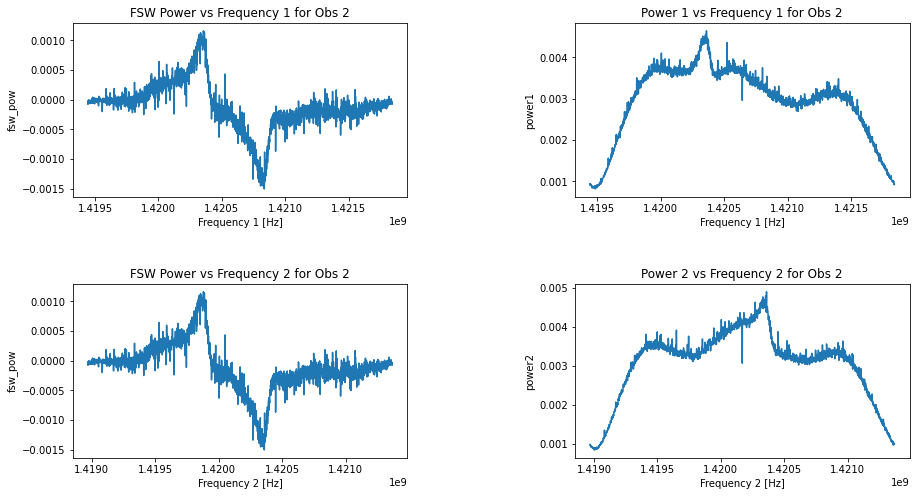

In [49]:
# dark subtracted obs 2
f = plt.figure(figsize=(15,8))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.subplot(221)
plt.plot(obs2['freq1'], obs2['fsw_pow']-dark_lnaon_resistoroff['fsw_pow'])
plt.ylabel('fsw_pow')
plt.xlabel('Frequency 1 [Hz]')
plt.title('FSW Power vs Frequency 1 for Obs 2')

plt.subplot(222)
plt.plot(obs2['freq1'], obs2['power1']-dark_lnaon_resistoroff['power1'])
plt.ylabel('power1')
plt.xlabel('Frequency 1 [Hz]')
plt.title('Power 1 vs Frequency 1 for Obs 2')

plt.subplot(223)
plt.plot(obs2['freq2'], obs2['fsw_pow']-dark_lnaon_resistoroff['fsw_pow'])
plt.ylabel('fsw_pow')
plt.xlabel('Frequency 2 [Hz]')
plt.title('FSW Power vs Frequency 2 for Obs 2')

plt.subplot(224)
plt.plot(obs2['freq2'], obs2['power2']-dark_lnaon_resistoroff['power2'])
plt.ylabel('power2')
plt.xlabel('Frequency 2 [Hz]')
plt.title('Power 2 vs Frequency 2 for Obs 2')

plt.show()

In [50]:
# mask for Gaussian fitting over the emission line
mask = obs2[(obs2['freq1'] < 1.42045e9) & (obs2['freq1'] > 1.42025e9)]
mask_freq, mask_pow = mask['freq1'], mask['fsw_pow']
print(max(mask_freq)-min(mask_freq))

199218.75


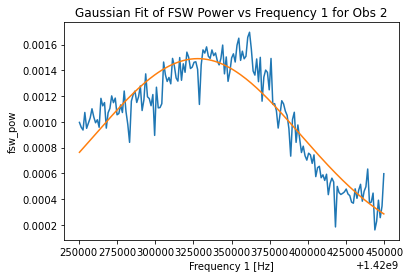

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
         amplitude              mean              stddev     
    -------------------- ------------------ -----------------
    0.001491131347950958 1420327870.0844111 66936.32317670986
estimated amplitude of emission line:  Parameter('amplitude', value=0.001491131347950958)
FWHM of emission line:  157622.9955571861
uncertainty of fitted model mean:  5118.7485680606615


In [51]:
fitter = modeling.fitting.LevMarLSQFitter()
model = modeling.models.Gaussian1D(amplitude=0.001, mean=1.4204e9, stddev=50000)
fitted_model = fitter(model, mask_freq, mask_pow)
plt.plot(mask_freq, mask_pow)
plt.plot(mask_freq, fitted_model(mask_freq))
plt.ylabel('fsw_pow')
plt.xlabel('Frequency 1 [Hz]')
plt.title('Gaussian Fit of FSW Power vs Frequency 1 for Obs 2')
plt.show()

print(fitted_model)
print("estimated amplitude of emission line: ", fitted_model.amplitude)
print("FWHM of emission line: ", fwhm(fitted_model.stddev))
print("uncertainty of fitted model mean: ", fitted_model.stddev/np.sqrt(len(mask_freq))) # calculate uncertainty

In [53]:
# use mean of gaussian to get observed frequency of HI and compare with vacuum frequency
# plug into Doppler formula to get velocity of source in relation to medium
c = 3e8 # m/s, speed o' light
f = fitted_model.mean # Hz, observed frequency
f_uncertainty = fitted_model.stddev/np.sqrt(len(mask_freq)) # observed freq uncertainty
f0 = 1.420405752e9 # Hz, HI frequency in vacuum
w0 = c/f0 
vr = 460 # m/s, velocity of observer, ie. velocity of earth around sun

print("speed of source, observer at rest: ", doppler_source_velocity(c,f,f0)) # speed assuming observer at rest
rv = doppler_moving_observer(c,f,f0,vr) # speed accounting for observatory motion around the Sun
print("speed of source, account for Earth/observatory motion around Sun: ", rv)

print("uncertainty of speed by an observer around Sun: ", error_prop_doppler(c,f,f0,f_uncertainty,vr,rv))


speed of source, observer at rest:  16450.127585870825
speed of source, account for Earth/observatory motion around Sun:  16910.152809388015
uncertainty of speed by an observer around Sun:  1081.1761179948355


#### Obs 3

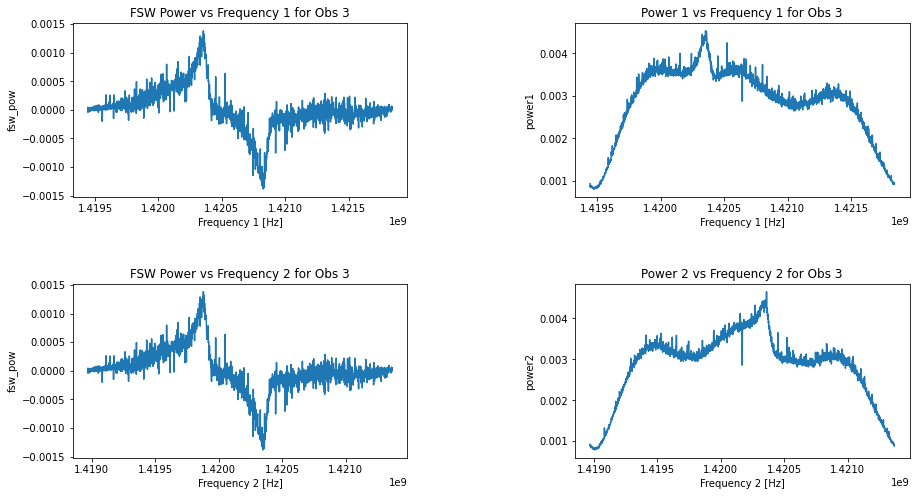

In [58]:
# dark subtracted obs 3
f = plt.figure(figsize=(15,8))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.subplot(221)
plt.plot(obs3['freq1'], obs3['fsw_pow']-dark_lnaon_resistoroff['fsw_pow'])
plt.ylabel('fsw_pow')
plt.xlabel('Frequency 1 [Hz]')
plt.title('FSW Power vs Frequency 1 for Obs 3')

plt.subplot(222)
plt.plot(obs3['freq1'], obs3['power1']-dark_lnaon_resistoroff['power1'])
plt.ylabel('power1')
plt.xlabel('Frequency 1 [Hz]')
plt.title('Power 1 vs Frequency 1 for Obs 3')

plt.subplot(223)
plt.plot(obs3['freq2'], obs3['fsw_pow']-dark_lnaon_resistoroff['fsw_pow'])
plt.ylabel('fsw_pow')
plt.xlabel('Frequency 2 [Hz]')
plt.title('FSW Power vs Frequency 2 for Obs 3')

plt.subplot(224)
plt.plot(obs3['freq2'], obs3['power2']-dark_lnaon_resistoroff['power2'])
plt.ylabel('power2')
plt.xlabel('Frequency 2 [Hz]')
plt.title('Power 2 vs Frequency 2 for Obs 3')

plt.show()

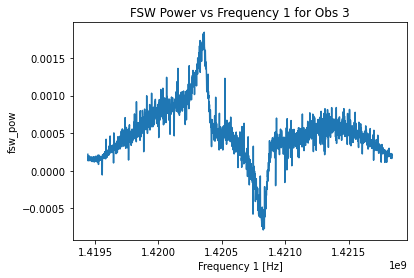

In [21]:
plt.plot(obs3['freq1'], obs3['fsw_pow'])
plt.ylabel('fsw_pow')
plt.xlabel('Frequency 1 [Hz]')
plt.title('FSW Power vs Frequency 1 for Obs 3')
plt.show()

In [59]:
# mask for Gaussian fitting over the emission line
mask = obs3[(obs3['freq1'] < 1.42045e9) & (obs3['freq1'] > 1.4202e9)]
mask_freq, mask_pow = mask['freq1'], mask['fsw_pow']
print(max(mask_freq)-min(mask_freq))

249609.375


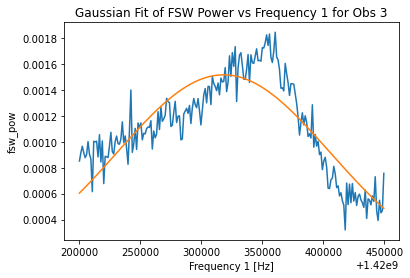

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
          amplitude              mean              stddev     
    --------------------- ------------------ -----------------
    0.0015154362789939143 1420318260.0138829 87186.71184124952
estimated amplitude of emission line:  Parameter('amplitude', value=0.0015154362789939143)
FWHM of emission line:  205309.0167041116
uncertainty of fitted model mean:  5959.960923823273


In [60]:
fitter = modeling.fitting.LevMarLSQFitter()
model = modeling.models.Gaussian1D(amplitude=0.001, mean=1.42035e9, stddev=50000)
fitted_model = fitter(model, mask_freq, mask_pow)
plt.plot(mask_freq, mask_pow)
plt.plot(mask_freq, fitted_model(mask_freq))
plt.ylabel('fsw_pow')
plt.xlabel('Frequency 1 [Hz]')
plt.title('Gaussian Fit of FSW Power vs Frequency 1 for Obs 3')
plt.show()

print(fitted_model)
print("estimated amplitude of emission line: ", fitted_model.amplitude)
print("FWHM of emission line: ", fwhm(fitted_model.stddev))
print("uncertainty of fitted model mean: ", fitted_model.stddev/np.sqrt(len(mask_freq))) # calculate uncertainty

In [61]:
# use mean of gaussian to get observed frequency of HI and compare with vacuum frequency
# plug into Doppler formula to get velocity of source in relation to medium
c = 3e8 # m/s, speed o' light
f = fitted_model.mean # Hz, observed frequency
f_uncertainty = fitted_model.stddev/np.sqrt(len(mask_freq)) # observed freq uncertainty
f0 = 1.420405752e9 # Hz, HI frequency in vacuum
w0 = c/f0 
vr = 460 # m/s, velocity of observer, ie. velocity of earth around sun

print("speed of source, observer at rest: ", doppler_source_velocity(c,f,f0)) # speed assuming observer at rest
rv = doppler_moving_observer(c,f,f0,vr) # speed accounting for observatory motion around the Sun
print("speed of source, account for Earth/observatory motion around Sun: ", rv)
print("uncertainty of speed by an observer around Sun: ", error_prop_doppler(c,f,f0,f_uncertainty,vr,rv))


speed of source, observer at rest:  18480.08053834414
speed of source, account for Earth/observatory motion around Sun:  18940.108874444137
uncertainty of speed by an observer around Sun:  1258.8645313148647
